In [1]:
import os
import h5py
import random
import pickle
import numpy as np
from collections import defaultdict
from tqdm.notebook import tqdm

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(font_scale = 1.8)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 4
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 14
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.xmargin'] = 0.1
matplotlib.rcParams['axes.ymargin'] = 0.1
matplotlib.rc('font', **{'weight': 'normal', 'size': 28})

total_BASE = "/home/noveens/common_folder/driving_data/aiodrive/full/"
all_sequence_bases = os.listdir(total_BASE + "control/")

/Users/jessicaechterhoff/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


FileNotFoundError: [Errno 2] No such file or directory: '/home/noveens/common_folder/driving_data/aiodrive/full/control/'

In [2]:
def load_pkl(load_path):
    with open(load_path, 'rb') as f:
        pkl_data = pickle.load(f, encoding='latin1')
    return pkl_data

In [53]:
load_pkl(BASE + "box/000000.pkl")['fr_cam'][0]

matrix([[-257.01616665,    2.01073953,   -1.22424243],
        [-259.35722946,    2.01211259,   -1.15345642],
        [-259.20200065,    2.24877543,    3.97574151],
        [-256.86093784,    2.24740237,    3.90495551],
        [-257.01491242,    0.45823564,   -1.15264736],
        [-259.35597522,    0.4596087 ,   -1.08186135],
        [-259.20074641,    0.69627154,    4.04733658],
        [-256.85968361,    0.69489848,    3.97655058]])

In [23]:
path = BASE + "label_{}/000000.txt"
for i in range(5):
    f = open(path.format(i)) ; lines = f.readlines() ; f.close()
    
    print("\n{}:".format(i))
    print(len(lines))
    print(lines[-1].strip())
    
f = open(path.format(0)) ; lines = f.readlines() ; f.close()
set(list(map(lambda l : l.strip().split()[0], lines)))


0:
513
Car 1.00 1.00 0 0 0 0 0 0 0 0 -1000.00 -1000.00 -1000.00 -1000.00 2.2031 2.5091 6.5872 54.1755 3.0155 26.9328 1.0285 0.0341 0.0004 512 tesla_cybertruck

1:
513
Car 1.00 1.00 0 0 0 0 0 0 0 0 -1000.00 -1000.00 -1000.00 -1000.00 2.2031 2.5091 6.5872 54.1755 3.0155 26.9328 1.0285 0.0341 0.0004 512 tesla_cybertruck

2:
513
Car 1.00 1.00 0 0 0 0 0 0 0 0 -1000.00 -1000.00 -1000.00 -1000.00 2.2031 2.5091 6.5872 54.1755 3.0155 26.9328 1.0285 0.0341 0.0004 512 tesla_cybertruck

3:
513
Car 1.00 1.00 0 0 0 0 0 0 0 0 -1000.00 -1000.00 -1000.00 -1000.00 2.2031 2.5091 6.5872 54.1755 3.0155 26.9328 1.0285 0.0341 0.0004 512 tesla_cybertruck

4:
513
Car 0.00 1.00 0 0 0 0 0 0 0 0 622.77 367.35 688.70 392.38 2.2031 2.5091 6.5872 54.1755 3.0155 26.9328 1.0285 0.0341 0.0004 512 tesla_cybertruck


{'Car', 'Cyclist', 'Motorcycle', 'Pedestrian'}

In [4]:
load_pkl(BASE + "control/000000.pkl").keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [5]:
a = load_pkl(BASE + "motion/000000.pkl")
print(a.keys(), "\n\n", a[0].keys(), "\n")
print("EGO:")
print(a['ego_loc'].T)
print(a['ego_speed'].T)
print(a['ego_speed_ang'].T)

print("\n\n0th detection:")
print(a[0]['loc'].T)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 'ego_speed_ang', 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

In [44]:
def get_speed(vel):
    return np.sum(vel ** 2) ** 0.5

def angle(v1, v2):
    # [0, np.pi]
    return np.arccos(np.dot(v1, v2) / (get_speed(v1) * get_speed(v2)))

def dist(p1, p2):
    return get_speed(p1 - p2)

a0 = load_pkl(BASE + "motion/000000.pkl")
a1 = load_pkl(BASE + "motion/000001.pkl")
a2 = load_pkl(BASE + "motion/000002.pkl")
# print(a.keys(), "\n\n", a0[0].keys(), "\n")
print("EGO:")
print(get_speed((a1['ego_loc'].T - a0['ego_loc'].T) / 0.1))
# print(a0['ego_speed'].T)
# print(a0['ego_speed_ang'].T)

print(a1['ego_loc'].T - a0['ego_loc'].T)
print(get_speed(a1['ego_speed'].T))
print(get_speed(a0['ego_speed'].T))
print(get_speed((a0['ego_speed'].T + a1['ego_speed'].T) / 2))
# print(a1['ego_speed_ang'].T)

# print("\n\n0th detection:")
# print(a[0]['loc'].T)

EGO:
4.144874640717743
[[0.00774002 0.41441154 0.00173824]]
4.3451917852413215
3.939714926004761
4.14245324397655


  0%|          | 0/500 [00:00<?, ?it/s]

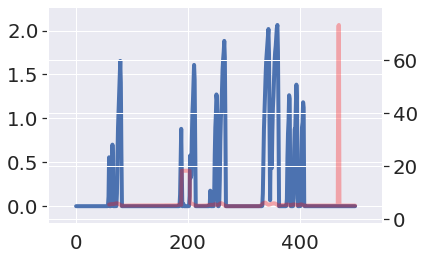

In [202]:
for seq_name in all_sequence_bases:

    pos, speed, gap = [], [], []

    curr_vel = None
    for i in tqdm(range(0, 500)):
        a = load_pkl(total_BASE + "motion/{}/{:0>6}.pkl".format(seq_name, i))
        ego_pos = a['ego_loc']
        ego_vel = a['ego_speed'][:, 0]

        pos.append(ego_pos)
        speed.append(get_speed(ego_vel))

        if speed[-1] > 0.3: curr_vel = ego_vel
        if curr_vel is None: 
            gap.append(None)
            continue

        # Car in front
        in_front = []
        for key in a:
            if type(key) == int:

                f = open(total_BASE + "label_0/{}/{:0>6}.txt".format(seq_name, i)) ; lines = f.readlines() ; f.close()
                if key >= len(lines): continue
                object_type = lines[key].strip().split()[0]
                if object_type not in [ 'Motorcycle', 'Car' ]: continue

                obj_pos = a[key]['loc']
                obj_vel = a[key]['speed'][:, 0]

                # Don't know why this happens
                if dist(ego_pos, obj_pos) < 0.05: continue

                difference_vector = (obj_pos - ego_pos)[:2]
                relative_angle = angle(curr_vel[:2], difference_vector)
                perpendicular_distance = get_speed(difference_vector) * np.sin(relative_angle)
                straight_distance = get_speed(difference_vector) * np.cos(relative_angle)

                if straight_distance < 0.05 : continue # For behind vehicles
                if (get_speed(obj_vel) > 0.3 and np.abs(angle(curr_vel[:2], obj_vel[:2])) > np.pi / 6): continue
                if (get_speed(obj_vel) > 0.3 and np.abs(angle(difference_vector[:, 0], obj_vel[:2])) > np.pi / 6): continue

                if perpendicular_distance < 3:
                    # angle(obj_vel[:2], (obj_pos - ego_pos)[:2]) < 0.02:
                    in_front.append([ 
                        perpendicular_distance,
                        straight_distance, 
                        # dist(ego_pos, obj_pos), 
                        # obj_pos, obj_vel 
                    ])

        if len(in_front) > 0: gap.append(sorted(in_front)[0][1]) #, key = lambda x: x[0])
        else: gap.append(-1.0)
    
    plt.clf()
    plt.plot(list(range(len(speed))), speed)
    ax = plt.twinx()
    ax.plot(list(range(len(gap))), gap, color = 'red', alpha = 0.3)
    plt.show()
    
    break
# plt.xlim(420, 500)

In [76]:
for i in range(50, 51):
    a = load_pkl(BASE + "motion/{:0>6}.pkl".format(i))
    ego_pos = a['ego_loc']
    ego_vel = a['ego_speed'][:, 0]
    
    pos.append(ego_pos)
    speed.append(get_speed(ego_vel))
    
#     bounding_box = load_pkl(BASE + "box/{:0>6}.pkl").format(i)['fr_cam']
    
    # Car in front
    in_front = []
    for key in a:
        if type(key) == int:
            obj_pos = a[key]['loc']
            obj_vel = a[key]['speed'][:, 0]
            
            if angle(ego_vel[:2], (obj_pos - ego_pos)[:2]) <  0.02: # and dist(ego_pos, obj_pos) > 0.02:
                in_front.append([ 
                    angle(ego_vel[:2], (obj_pos - ego_pos)[:2])[0],
                    dist(ego_pos, obj_pos), 
                    obj_pos, obj_vel 
                ])
                
    in_front = sorted(in_front, key = lambda x: x[0])
    print(in_front)

[[0.0027274553097387895, 26.54035210713483, array([[-54.2698822 ],
       [ 80.20252991],
       [  0.72695035]]), array([-2.77070308,  0.12675782,  0.        ])], [0.003931281400940887, 22.18107533822475, array([[-5.43806381e+01],
       [ 7.58501053e+01],
       [ 4.60413732e-02]]), array([ 1.16550461e-06, -5.91293028e-05,  1.65922722e-06])]]


/tmp/ipykernel_3026118/3284191080.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.arccos(np.dot(v1, v2) / (get_speed(v1) * get_speed(v2)))


In [25]:
pos = np.array(pos)
print(np.min(pos[:, 0]), np.max(pos[:, 0]))
print(np.min(pos[:, 1]), np.max(pos[:, 1]))
print(np.min(pos[:, 2]), np.max(pos[:, 2]))

-117.82106018066406 -53.8942756652832
14.283369064331055 89.65614318847656
-0.004139061085879803 0.07314277440309525


MovieWriter Pillow unavailable; using Pillow instead.


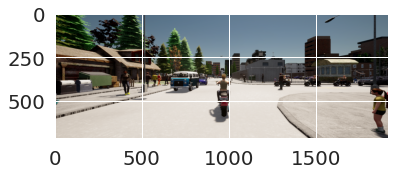

In [200]:
from PIL import Image
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML # to show the animation in Jupyter

for seq_name in all_sequence_bases:
    fig, ax = plt.subplots() # creating my fig
    camera = Camera(fig)# the camera gets the fig we'll plot
    for i in range(0, 1000, 10):
        img = Image.open(total_BASE + 'image_2/{}/{:0>6}.png'.format(seq_name, i))
        ax.imshow(img)
        camera.snap() # the camera takes a snapshot of the plot
    animation = camera.animate() # animation ready
    animation.save('animation.gif', fps=10)
    HTML(animation.to_html5_video()) # displaying the animation
    
    break